In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import statistics

In [4]:
#mean, median, mode
df = sns.load_dataset('tips')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
np.mean(df['total_bill'])

19.785942622950824

In [7]:
np.median(df['total_bill'])

17.795

In [8]:
statistics.mode(df['total_bill'])

13.42

C:\Users\ankussingh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


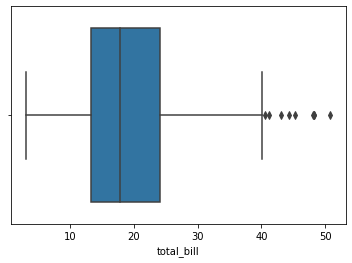

In [9]:
sns.boxplot(df['total_bill'])

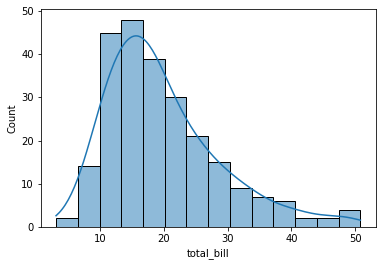

In [12]:
sns.histplot(df['total_bill'],kde = True)

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
np.mean(df)

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [20]:
#Percentile, 25percentile, 27 percentile
np.percentile(df['total_bill'],[25,75])

array([13.3475, 24.1275])

# Outlier

Z_Score

In [91]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [92]:
outlier = []
threshold = 3
def detect_outliers(data):
    mean = np.mean(dataset) 
    sd = np.std(dataset)
    
    for i in data:
        Z_score = (i - mean)/sd
        if np.abs(Z_score) > threshold:
            outlier.append(i)

    return outlier

In [93]:
detect_outliers(dataset) 

[102, 107, 108]

# IQR

In [94]:
dataset

[11,
 10,
 12,
 14,
 12,
 15,
 14,
 13,
 15,
 102,
 12,
 14,
 17,
 19,
 107,
 10,
 13,
 12,
 14,
 12,
 108,
 12,
 11,
 14,
 13,
 15,
 10,
 15,
 12,
 10,
 14,
 13,
 15,
 10]

In [108]:
dataset=sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [96]:

q1,q3=np.percentile(dataset,[25,75])

In [97]:
IQR = q3-q1
IQR

3.0

In [98]:
Lower_fence = q1 - (1.5*IQR)

In [99]:
Higher_fence = q3 + (1.5*IQR)

In [100]:
Lower_fence, Higher_fence

(7.5, 19.5)

In [117]:
outlier = []
def detect_outlier_iqr(data):
    for i in dataset:
        if i < 7.5:
            outlier.append(i)
        elif i > 19.5:
            outlier.append(i)
    return outlier

In [118]:
detect_outlier_iqr(dataset)

[102, 107, 108]

# Z Test 

In [120]:
from statsmodels.stats.weightstats import ztest as ztest

In [9]:
data = [88, 92, 94, 96, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

In [10]:
np.mean(data)

103.88888888888889

In [124]:
ztest(data, value = 100)

(1.9212149795165048, 0.05470461045119405)

# T test 

In [125]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [126]:
mean = np.mean(ages)

In [127]:
mean

30.34375

In [139]:
sample_size = 10
age_sample = np.random.choice(ages,sample_size)

In [140]:
age_sample

array([24, 18, 27, 20, 18, 23, 27, 17, 18, 55])

In [141]:
np.mean(age_sample)

24.7

In [133]:
from scipy.stats import ttest_1samp

In [134]:
ttest_1samp(age_sample,30)

Ttest_1sampResult(statistic=1.0128640634522137, pvalue=0.33757917553550987)

In [138]:
ttest_1samp(age_sample,26)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [142]:
ttest_1samp(age_sample,24.7)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)